<a href="https://colab.research.google.com/github/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/blob/main/Aprendizado-Profundo/ELT575_Semana3_119826.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsoes Temporais LSTM - Tesla

Aprendizado-Profundo/

In [1]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Importando dados

Nesse problema de predição, usaremos um dataset público do github. Assim, usamos a função read_csv do pandas passando uma URL como caminho dos dados.
* Usaremos os últimos 20% dos pontos temporais como dados de teste

* Uma transformação Min-Max é usada apenas para colocar os dados numa escala [0,1]

In [2]:
tesla_url = 'https://raw.githubusercontent.com/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/refs/heads/main/Aprendizado-Profundo/dados/tesla_stock_2015_2022.csv'
tesla = read_csv(tesla_url)
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [3]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[4], engine='python') # 4 = Close
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

#sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
tesla_url = 'https://raw.githubusercontent.com/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/refs/heads/main/Aprendizado-Profundo/dados/tesla_stock_2015_2022.csv'
train_data, test_data, data = get_train_test(tesla_url)

# Preparação dos dados

Para preparar os dados para a rede recorrente, devemos quebrar a série temporal em vetores de tamanho igual ao número de entradas da nossa rede (estamos considerando assim quantos time steps passados estamos usando para prever o time step atual)

In [4]:
len(train_data)

1315

In [5]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 7 # 2 semana
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Construindo o modelo

## 1. Inicie com uma única camada LSTM, como no exemplo original, mas com 50 unidades ocultas. Reporte o resultado como feito no exemplo (Raíz do Erro Médio Quadrático e plot de valores das ações vs. valores previstos)


* Função de ativação tanh em ambas as camadas da rede.

* Como função objetiva, usaremos o erro médio quadrático, já que estamos lidando com um problema de predição

In [6]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=1, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
187/187 - 4s - 22ms/step - loss: 6.9012e-04 - val_loss: 0.0039
Epoch 2/30
187/187 - 1s - 5ms/step - loss: 1.4092e-04 - val_loss: 0.0077
Epoch 3/30
187/187 - 2s - 8ms/step - loss: 9.2481e-05 - val_loss: 0.0265
Epoch 4/30
187/187 - 1s - 6ms/step - loss: 1.5244e-04 - val_loss: 0.0252
Epoch 5/30
187/187 - 1s - 5ms/step - loss: 1.5156e-04 - val_loss: 0.0055
Epoch 6/30
187/187 - 1s - 7ms/step - loss: 8.1126e-05 - val_loss: 0.0081
Epoch 7/30
187/187 - 1s - 4ms/step - loss: 1.3621e-04 - val_loss: 0.0098
Epoch 8/30
187/187 - 1s - 7ms/step - loss: 9.7211e-05 - val_loss: 0.0037
Epoch 9/30
187/187 - 1s - 5ms/step - loss: 8.4949e-05 - val_loss: 0.0043
Epoch 10/30
187/187 - 1s - 5ms/step - loss: 8.5608e-05 - val_loss: 0.0035
Epoch 11/30
187/187 - 1s - 4ms/step - loss: 6.3060e-05 - val_loss: 0.0104
Epoch 12/30
187/187 - 1s - 7ms/step - loss: 9.9381e-05 - val_loss: 0.0046
Epoch 13/30
187/187 - 1s - 7ms/step - loss: 8.0118e-05 - val_loss: 0.0087
Epoch 14/30
187/187 - 1s - 6ms/step - loss: 5.

In [7]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
  train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
  test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
  print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
  print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))
  return train_rmse, test_rmse

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
train_rmse_base, test_rmse_base = print_error(trainY, testY, train_predict, test_predict)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Raíz do Erro Médio Quadrático para Treino: 0.005
Raíz do Erro Médio Quadrático para Teste: 0.098


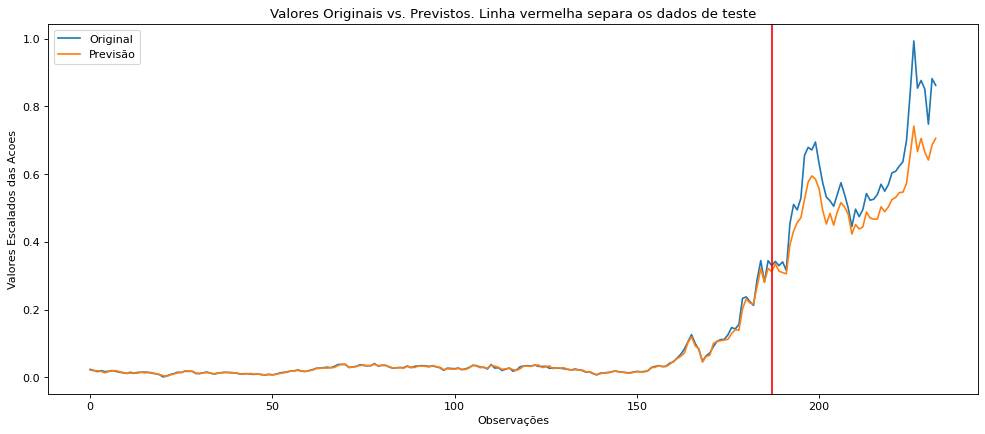

In [8]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados das Acoes')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')
plot_result(trainY, testY, train_predict, test_predict)


* Raíz do Erro Médio Quadrático para Treino: 0.005
* Raíz do Erro Médio Quadrático para Teste: 0.098

Possivel Overfitting do modelo Base

## 2. Experimente adicionar mais uma camada LSTM após a primeira (mesmo número de unidades ocultas do item anterior). Reporte o resultado da mesma forma que o item anterior e comente se houve melhora

Dica: para conectar duas camadas LSTM do Tensorflow, devemos usar o parâmetro return_sequences=True. A última camada LSTM antes da Dense não ser return_sequences=False.

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 - 3s - 17ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 2/30
187/187 - 2s - 12ms/step - loss: 5.5043e-04 - val_loss: 0.0548
Epoch 3/30
187/187 - 1s - 8ms/step - loss: 3.3403e-04 - val_loss: 0.0074
Epoch 4/30
187/187 - 2s - 12ms/step - loss: 1.9178e-04 - val_loss: 0.0040
Epoch 5/30
187/187 - 1s - 7ms/step - loss: 3.2799e-04 - val_loss: 0.0072
Epoch 6/30
187/187 - 1s - 7ms/step - loss: 2.1000e-04 - val_loss: 0.0069
Epoch 7/30
187/187 - 1s - 7ms/step - loss: 1.4493e-04 - val_loss: 0.0046
Epoch 8/30
187/187 - 1s - 7ms/step - loss: 1.1285e-04 - val_loss: 0.0114
Epoch 9/30
187/187 - 2s - 13ms/step - loss: 1.7042e-04 - val_loss: 0.0172
Epoch 10/30
187/187 - 1s - 8ms/step - loss: 1.2543e-04 - val_loss: 0.0131
Epoch 11/30
187/187 - 2s - 9ms/step - loss: 1.3229e-04 - val_loss: 0.0505
Epoch 12/30
187/187 - 2s - 11ms/step - loss: 1.1899e-04 - val_loss: 0.0074
Epoch 13/30
187/187 - 1s - 7ms/step - loss: 2.7453e-04 - val_loss: 0.0118
Epoch 14/30
187/187 - 1s - 6ms/step - loss: 9.4904e-05 - 

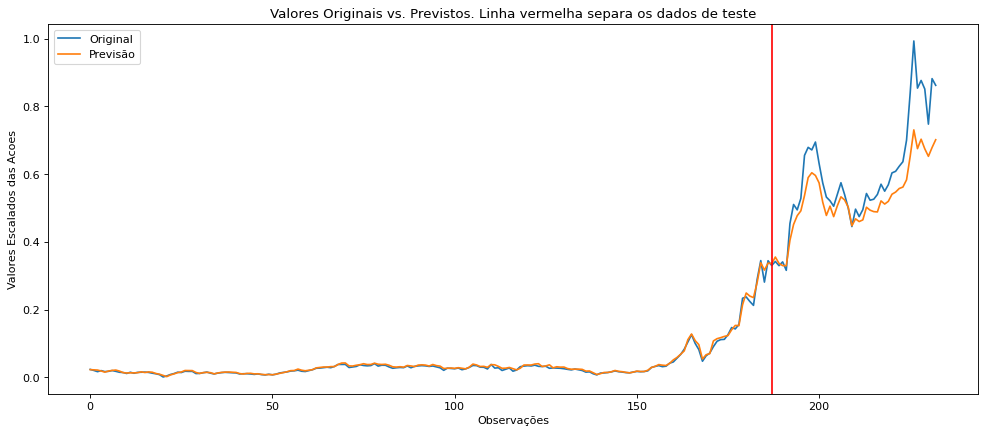

In [9]:
def create_RNN2(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0], return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model2 = create_RNN2(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=1, verbose=2)

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Modelo 2: Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Modelo 2: Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))
    return train_rmse, test_rmse

# make predictions
train_predict2 = model2.predict(trainX)
test_predict2 = model2.predict(testX)
# Mean square error
train_rmse_2LSTM, test_rmse_2LSTM = print_error(trainY, testY, train_predict2, test_predict2)

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados das Acoes')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')
plot_result(trainY, testY, train_predict2, test_predict2)

Saimos de:
* Raíz do Erro Médio Quadrático para Treino: 0.005
* Raíz do Erro Médio Quadrático para Teste: 0.098

Para, com mais 1 camada LSTM:
* Raíz do Erro Médio Quadrático para Treino: 0.005
* Raíz do Erro Médio Quadrático para Teste: 0.091

Com a adicao de uma camada LSTM a mais, o modelo teve uma leve melhorada do  RMSE de teste. Mostrando uma maior capacidade de generalizacao.

## 3. Adicione um Dropout de 20% após cada camada LSTM e reporte se houve melhora.

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 - 4s - 23ms/step - loss: 8.3973e-04 - val_loss: 0.0417
Epoch 2/30
187/187 - 1s - 6ms/step - loss: 3.1202e-04 - val_loss: 0.0251
Epoch 3/30
187/187 - 1s - 8ms/step - loss: 3.5767e-04 - val_loss: 0.0634
Epoch 4/30
187/187 - 2s - 13ms/step - loss: 3.1496e-04 - val_loss: 0.0864
Epoch 5/30
187/187 - 1s - 6ms/step - loss: 0.0012 - val_loss: 0.0137
Epoch 6/30
187/187 - 1s - 6ms/step - loss: 1.2444e-04 - val_loss: 0.0065
Epoch 7/30
187/187 - 1s - 6ms/step - loss: 1.8685e-04 - val_loss: 0.0042
Epoch 8/30
187/187 - 1s - 7ms/step - loss: 1.0584e-04 - val_loss: 0.0056
Epoch 9/30
187/187 - 1s - 7ms/step - loss: 1.0595e-04 - val_loss: 0.0036
Epoch 10/30
187/187 - 1s - 7ms/step - loss: 2.6374e-04 - val_loss: 0.0051
Epoch 11/30
187/187 - 1s - 7ms/step - loss: 1.8160e-04 - val_loss: 0.1002
Epoch 12/30
187/187 - 2s - 10ms/step - loss: 7.3856e-04 - val_loss: 0.0834
Epoch 13/30
187/187 - 1s - 7ms/step - loss: 3.5365e-04 - val_loss: 0.0122
Epoch 14/30
187/187 - 3s - 14ms/step - loss: 1.0927e-04 - v

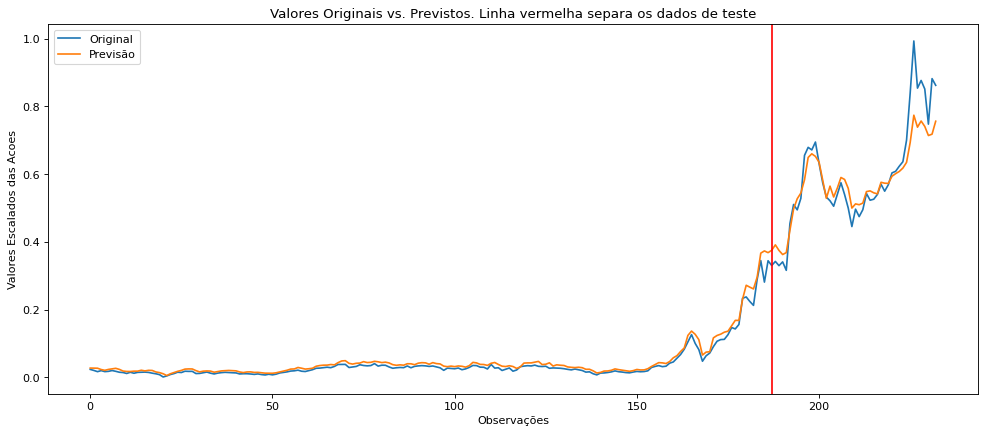

In [10]:
def create_RNN3(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0], return_sequences=True))
    model.add(Dropout(0.20))
    model.add(LSTM(hidden_units, activation=activation[0]))
    model.add(Dropout(0.20))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model3 = create_RNN3(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model3.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=1, verbose=2)

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Modelo 3: Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Modelo 3: Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))
    return train_rmse, test_rmse
# make predictions
train_predict3 = model3.predict(trainX)
test_predict3 = model3.predict(testX)
# Mean square error
train_rmse_2LSTM_dropout, test_rmse_2LSTM_dropout = print_error(trainY, testY, train_predict3, test_predict3)

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados das Acoes')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')
plot_result(trainY, testY, train_predict3, test_predict3)

Modelo 2 com duas camadas LSTM:
* Raíz do Erro Médio Quadrático para Treino: 0.005
* Raíz do Erro Médio Quadrático para Teste: 0.091

Modelo 3 com duas camadas Dropout apos LSTM:
* Modelo 3: Raíz do Erro Médio Quadrático para Treino: 0.012
* Modelo 3: Raíz do Erro Médio Quadrático para Teste: 0.064

Desta vez novo modelo, teve um ganho mais substancial do RMSE do teste, mesmo com a perda dos dados de treino devido ao dropout, isto e um bom sinal POis demontra que o modelo nao esta sobreajustado aos dados de treino.

## 4. Finalmente, modifique o modelo para que ele tenha 4 blocos LSTM (50 unidades ocultas) + Dropout (20 %) antes da camada Dense. Reporte os resultados deste último modelo e compare com os demais

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Modelo 4: Raíz do Erro Médio Quadrático para Treino: 0.012
Modelo 4: Raíz do Erro Médio Quadrático para Teste: 0.202


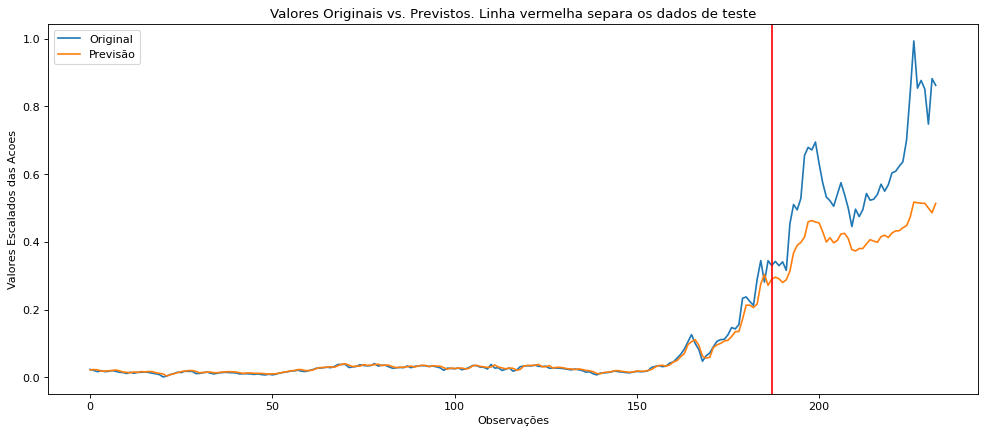

In [11]:
def create_RNN4(hidden_units, dense_units, input_shape, activation):
    model = Sequential()

    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=True))
    model.add(Dropout(0.20))

    model.add(LSTM(hidden_units, activation=activation[0], return_sequences=True))
    model.add(Dropout(0.20))

    model.add(LSTM(hidden_units, activation=activation[0], return_sequences=True))
    model.add(Dropout(0.20))

    model.add(LSTM(hidden_units, activation=activation[0], return_sequences=False))
    model.add(Dropout(0.20))

    model.add(Dense(units=dense_units, activation=activation[1]))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

model4 = create_RNN4(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model4.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=1, verbose=0)

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Modelo 4: Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Modelo 4: Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))
    return train_rmse, test_rmse
# make predictions
train_predict4 = model4.predict(trainX)
test_predict4 = model4.predict(testX)
# Mean square error
train_rmse_4LSTM, test_rmse_4LSTM = print_error(trainY, testY, train_predict4, test_predict4)

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados das Acoes')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')

plot_result(trainY, testY, train_predict4, test_predict4)

Modelo 3 com duas camadas Dropout apos LSTM:

* Modelo 3: Raíz do Erro Médio Quadrático para Treino: 0.012
* Modelo 3: Raíz do Erro Médio Quadrático para Teste: 0.064

Modelo 4 - Bloco com 4 LSTM
* Modelo 3: Raíz do Erro Médio Quadrático para Treino: 0.012
* Modelo 3: Raíz do Erro Médio Quadrático para Teste: 0.202

Porem, desta vez, o modelo piorou, ficando muito ajustado ao dados de treino. E perdendo muito da capacidade de generalizacao.

## Resultados Obtidos

In [12]:
resultados = [
    {'Modelo': 'Base', 'treino' : train_rmse_base, 'Teste': test_rmse_base},
    {'Modelo': '2 LSTM', 'treino' : train_rmse_2LSTM, 'Teste': test_rmse_2LSTM},
    {'Modelo': '2 LSTM + Dropout', 'treino' : train_rmse_2LSTM_dropout, 'Teste': test_rmse_2LSTM_dropout},
    {'Modelo': '4 LSTM', 'treino' : train_rmse_4LSTM, 'Teste': test_rmse_4LSTM}
    ]
import pandas as pd
tabela_resultados = pd.DataFrame(resultados)
tabela_resultados

,Modelo,treino,Teste
0,Base,0.004732,0.097692
1,2 LSTM,0.005183,0.090691
2,2 LSTM + Dropout,0.012488,0.064045
3,4 LSTM,0.011578,0.202174


Com base na tabela podemos concluir que o melhor modelo foi o 2 LSTMs + Dropout, com o menor RMSE de teste. E que o ultimo modelo, o mais complexo, se ajustou severamente aos dados de treino e perdeu muito da sua capacidade de generalizacao.